In [1]:
import numpy , random , math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt

In [21]:
numpy.random.seed(100)
classA = numpy.concatenate(
    (numpy.random.randn(10, 2) * 0.2 + [1.5, 0.5],
     numpy.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = numpy.random.randn(20, 2) * 0.2 + [0.0 , -0.5]

inputs = numpy.concatenate((classA, classB))
targets = numpy.concatenate(
    (numpy.ones(classA.shape[0]),
     -numpy.ones(classB.shape[0])))

N = inputs.shape[0]

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

In [22]:
#Kernel Functions
p = 2
sigma = 0.2

def linearKernel(x ,y):
    return numpy.dot(x, y)

def polynomialKernel(x, y):
    return (numpy.dot(x, y) + 1)**p

def radialKernel(x, y):
    distance = numpy.linalg.norm(x - y)
    return math.exp(-(distance**2)/(2*(sigma**2)))

kernel = radialKernel

In [23]:
#Pre-compute P matrix
pMatrix = numpy.zeros((N, N))
for i in range(N):
    for j in range(N):
        pMatrix[i][j] = targets[i]*targets[j]*kernel(inputs[i], inputs[j])    

In [24]:
#Objective Funtion
def objective(alpha):
    return (1/2)*numpy.dot(alpha, numpy.dot(alpha, pMatrix)) - numpy.sum(alpha)

In [25]:
#zerofun Function
def zerofun(alpha):
    return numpy.dot(alpha, targets)

In [26]:
#Minimize
start = numpy.zeros(N)
C = 10000
B = [(0, None) for b in range(N)] #no slack
#B = [(0, C) for b in range(N)] #with slack
XC = {'type':'eq', 'fun':zerofun}

ret = minimize(objective, start, bounds=B, constraints=XC)

In [27]:
#Extract non zero alphas
alpha = ret['x']
nonZeroAlphas = []

e = pow(10, -5)

for i in range(N):
    if abs(alpha[i]) > e:
        nonZeroAlphas.append([alpha[i], inputs[i], targets[i]])

In [28]:
#b
bSum = 0
for i in nonZeroAlphas:
    bSum += i[0]* i[2] * kernel(i[1], nonZeroAlphas[0][1])
b = bSum - nonZeroAlphas[0][2]

In [29]:
#Indicator
def ind(x, y):
    indSum = 0
    for i in nonZeroAlphas:
        indSum += i[0]* i[2] * kernel([x, y], i[1])
    return indSum - b

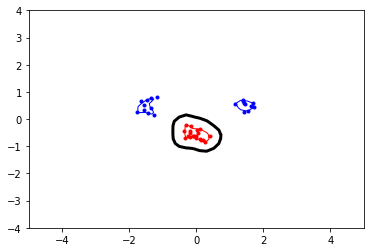

In [30]:
plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')

xgrid = numpy.linspace(-5, 5)
ygrid = numpy.linspace(-4, 4)
grid = numpy.array([[ind(x, y) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors = ('red', 'black', 'blue'), linewidths = (1, 3, 1))
#plt.axis('equal')
plt.savefig('NoSlackRegular.pdf')
plt.show()